We want to replicate the author's data from the lcfit package to make sure the implementation of lcfit on the new data is correct. we start off with implementing the tests provided in the package to see how the model works:


## The first test:


There are two inputs for this test :
 1. a list.  [id]  [period]
 2. a photometric time series directory.   [time]  [value]  [value_error]





 

##### The list input:

the first test has a list file test1.lst which consist of 3 RRL stars from the OGLE-IV survey. This list shows the id and period of these stars.
This list acts like a sort of metadata.

##### The photometric time series directory:
this directory includes 3 .dat files corresponding to each star. inside this files we have a times series, their values, and the value errors.sometimes for each time we have many values and their errors which shows that the suvery has been conducted with different photometric aperture sizes.

In [26]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import os
import shutil
import numpy as np

plt.rcParams['figure.figsize'] = [10, 5]



custom_style_gold = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#FFFFF0',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 8,
    'legend.fontsize': 10,
    'grid.color': '#E6DAA6',
}

custom_style_Lavender = {
    'axes.labelcolor': 'blue',
    'axes.edgecolor': 'gray',
    'axes.facecolor': '#E6E6FA',
    'xtick.color': 'green',
    'ytick.color': 'red',
    'font.size': 8,
    'legend.fontsize': 10,
    'grid.color': '#C79FEF',
}





In [2]:
file_path = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test1.lst'

data = []
with open(file_path, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

test1_lst = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ')
test1_lst.drop(columns= 'Unnamed: 1', inplace= True)
test1_lst

,id,period
0,b56841,0.580855
1,b57131,0.537362
2,b21314,0.562962


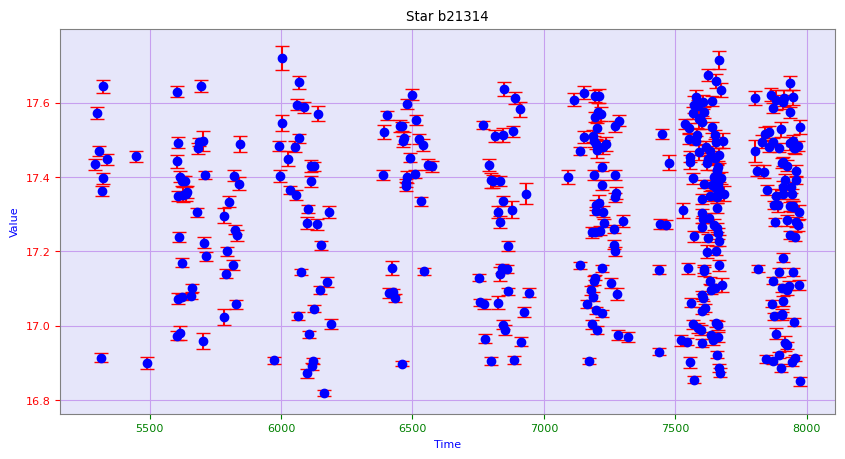

In [34]:
plt.style.use(custom_style_Lavender)



file_path_14 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b21314.dat'

data = []
with open(file_path_14, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b21314 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b21314.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b21314

plt.errorbar(b21314.Time, b21314.Value, yerr=b21314.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b21314')
plt.grid(True)

# Display the plot
plt.show()



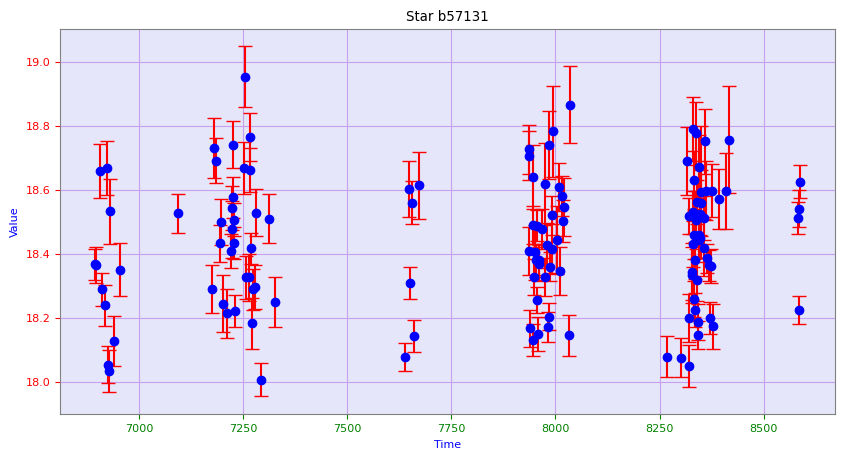

In [35]:
plt.style.use(custom_style_Lavender)




file_path_31 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b57131.dat'

data = []
with open(file_path_31, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b57131 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b57131.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b57131

plt.errorbar(b57131.Time, b57131.Value, yerr=b57131.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Star b57131')
plt.grid(True)

# Display the plot
plt.show()


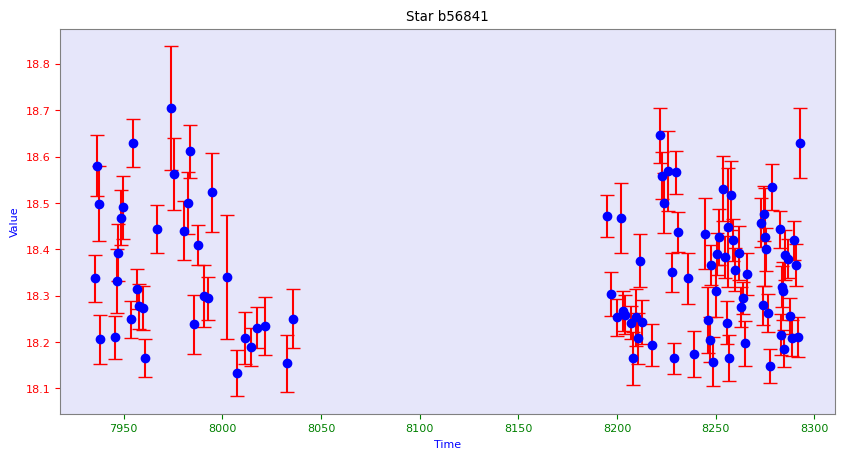

In [36]:
plt.style.use(custom_style_Lavender)



file_path_41 = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test_photometry/b56841.dat'

data = []
with open(file_path_41, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        data.append(out_line)

b56841 = pd.read_csv(io.StringIO(''.join(data)),delimiter = ' ', header= None)
b56841.columns = {'Time': '0', 'Value': '1', 'Value_error': '2'}
b56841

plt.errorbar(b56841.Time, b56841.Value, yerr=b56841.Value_error, fmt='o', color='b', ecolor='r', capsize=5)

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('mag')
plt.title('Star b56841')

# Display the plot
plt.show()

Now we want to process these light curves and make them phase-folded with lcfit package. We have to change the lcfit parameter file like this :

parameter file `lcfit.par`:

`--input_list test1.lst --input_dir test_photometry --n_data_cols 1 
--use_data_cols 1 --is_err_col`


In [3]:
!python lcfit.py @lcfit.par

===================> OBJECT 1 : 6380659528686603008<===================
object 1 (6380659528686603008)
./DR3_time_series_g/6380659528686603008.dat found.

----------
Dataset 1
----------
n_LC = 50
P_in = 0.55006783
---------- Direct Fourier fit ----------

Iteration 1
order = 4  --->  score = 0.05802443
order = 5  --->  score = 0.03854090
order = 6  --->  score = 0.02237606

optimal order = 6  (mean CV score = 0.022)
number of outliers: 1
Iteration 2
order = 4  --->  score = 0.05982018
order = 5  --->  score = 0.04373419
order = 6  --->  score = 0.01480130

optimal order = 6  (mean CV score = 0.015)
number of outliers: 0

object: 6380659528686603008  ,   N=49 (50)  ,  ap. 1:  N_F=6  ,  P=0.550067  ,  dP=-0.000001  ,  sig=0.010  ,  cost=0.0026  ,  <mag>=12.748  ,  SNR=688.20
RESULTS:
object: 6380659528686603008  ,   N=49 (50)  ,  ap. 1:  N_F=6  ,  P=0.550067  ,  dP=-0.000001  ,  sig=0.010  ,  cost=0.0026  ,  <mag>=12.748,  SNR=688.20
Intercept: 12.747928378177196
Amplitudes: [0.31762224

## Outputs for test 1:

we have  outputs:

--output_param_file: The derived regression parameters and descriptive statistics are written to a file `test.dat`.

--output_data_dir: The outlier-free, phase-folded time series corresponding to the best dataset 
per input file is written to a subdirecory specified by  `phasedlc_test`.

--output_syn_dir: Synthetic time series (i.e., the best-fitting regression model evaluated over an equidistant phase grid) are written to the subdirectory specified by `synlc_test`.

--output_gpr_dir: the GPR models will be saved using `joblib` and written to files the provided directory `gpr_test`.

--plot_dir: Figures showing the phase-folded time series, the rejected outliers, and the 
best-fitting regression models are generated for each input time series and
written to a subdirectory specified by `lcplots_test`



Let's see the outputs:


In [17]:
file_path_test_out = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/test.dat'

data = []
with open(file_path_test_out, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        
            

        data.append(out_line)

test_out = pd.read_csv(io.StringIO(''.join(data)), delim_whitespace=True)

test_out

,id,Nep,period,totamp,A1,A2,A3,A1_e,A2_e,A3_e,...,meanmag_e,cost,aper,phcov,phcov2,snr,ZPErr,Npt,order,minmax
0,b56841,98,0.580853,0.447,0.153,0.066,0.064,0.011,0.010,0.009,...,0.007,0.1198,1,0.952,0.956,78.4,0.0,98,4,0.571
1,b57131,125,0.537361,0.617,0.213,0.104,0.066,0.015,0.013,0.016,...,0.011,0.3521,1,0.962,0.962,70.2,0.0,125,4,0.948
2,b21314,353,0.562962,0.768,0.239,0.133,0.087,0.003,0.003,0.003,...,0.002,0.1642,1,0.983,0.984,489.5,0.0,353,6,0.901


In [18]:
test_out.columns # these are in I-band 


Index(['id', 'Nep', 'period', 'totamp', 'A1', 'A2', 'A3', 'A1_e', 'A2_e',
       'A3_e', 'phi1', 'phi2', 'phi3', 'phi1_e', 'phi2_e', 'phi3_e', 'phi21',
       'phi21_e', 'phi31', 'phi31_e', 'meanmag', 'meanmag_e', 'cost', 'aper',
       'phcov', 'phcov2', 'snr', 'ZPErr', 'Npt', 'order', 'minmax'],
      dtype='object')

Text(0, 0.5, 'mag')

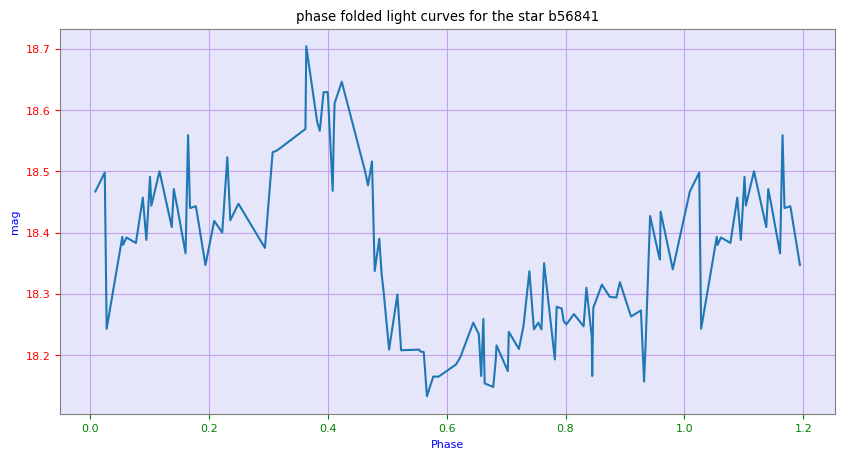

In [38]:
plt.style.use(custom_style_Lavender)


file_path_phased = '/Users/melikakeshavarz/Desktop/Thesis/Model/lcfit-1.0.0/phasedlc_test/b56841.dat'

data = []
with open(file_path_phased, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        
            

        data.append(out_line)

ph = pd.read_csv(io.StringIO(''.join(data)), delim_whitespace=True, header= None)
ph.columns = {'Phase': '0', 'Value': '1'}
ph


plt.plot(ph.Phase, ph.Value)
plt.title('phase folded light curves for the star b56841')
plt.xlabel('Phase')
plt.grid(True)
plt.ylabel('mag')

# Replication of Dekany's data for deep learning:

### The list input:

In [38]:
DR3 = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani.csv')


columns_to_extract = ['source_id', 'pf']
extracted_data = DR3[columns_to_extract]
extracted_data



,source_id,pf
0,6380659528686603008,0.550068
1,5412243359495900928,0.573513
2,4055098870077726976,0.427283
3,6735230515154698880,0.367562
4,2973954279102006656,0.656178
...,...,...
90,4473628559603349888,0.380685
91,3839232130153219456,0.547791
92,6897755139944897024,0.797464
93,6836508627130440064,0.800068


In [50]:
extracted_data.source_id.to_csv('/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication/id.txt', index = False, header= False)

In [39]:


output_file_path = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication/DR3.lst'


with open(output_file_path, 'w') as f:
    f.write('# id  period'+ '\n')
    extracted_data.to_string(f, index=False, header=False, float_format='%.8f')




### The times series input:

In [51]:
# this data frame is for star with the id 630421935431871232

df_time = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/LC/630421935431871232.csv', index_col= None)
df_time.drop(columns='Unnamed: 0', inplace= True)
df_t = df_time[['time', 'mag']]

out = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication/star.dat'

with open(out, 'w') as f:
    df_t.to_string(f, index = False , header = False)





In [14]:
path = '/Users/melikakeshavarz/Desktop/Thesis/data/LC/'
output_dir = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication/DR3_time_series_g/'

LC_dir = os.listdir(path)

for star_file in LC_dir:
    path_star = os.path.join(path, star_file)
    
    try:
        df = pd.read_csv(path_star)
        df.drop(columns='Unnamed: 0', inplace=True)
        df = df[['time', 'mag']]
        
        star_name = os.path.splitext(star_file)[0]  # Extract the star name without extension
        out_path = os.path.join(output_dir, f'{star_name}.dat')
        
        df.to_csv(out_path, sep='\t', index=False, header= None)  # Save the processed DataFrame as a .dat file
        

    except (UnicodeDecodeError, pd.errors.EmptyDataError) as e:
        print(f"Error processing {star_file}: {e}")










Error processing .DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte


## The difference between our data and Dekany's:

1. they have error for the mag in the time series (commented the flag)
2. they have zperr_col column in the time series (commented the flag)


In [4]:
# This is for Crestani's data
!python lcfit.py @lcfit.par

===================> OBJECT 1 : 6380659528686603008<===================
object 1 (6380659528686603008)
./DR3_time_series_g/6380659528686603008.dat found.

----------
Dataset 1
----------
n_LC = 50
P_in = 0.55006783
---------- Direct Fourier fit ----------

Iteration 1
order = 4  --->  score = 0.05802443
order = 5  --->  score = 0.03854090
order = 6  --->  score = 0.02237606

optimal order = 6  (mean CV score = 0.022)
number of outliers: 1
Iteration 2
order = 4  --->  score = 0.05982018
order = 5  --->  score = 0.04373419
order = 6  --->  score = 0.01480130

optimal order = 6  (mean CV score = 0.015)
number of outliers: 0

object: 6380659528686603008  ,   N=49 (50)  ,  ap. 1:  N_F=6  ,  P=0.550067  ,  dP=-0.000001  ,  sig=0.010  ,  cost=0.0026  ,  <mag>=12.748  ,  SNR=688.20
RESULTS:
object: 6380659528686603008  ,   N=49 (50)  ,  ap. 1:  N_F=6  ,  P=0.550067  ,  dP=-0.000001  ,  sig=0.010  ,  cost=0.0026  ,  <mag>=12.748,  SNR=688.20
Intercept: 12.747928378177196
Amplitudes: [0.31762224

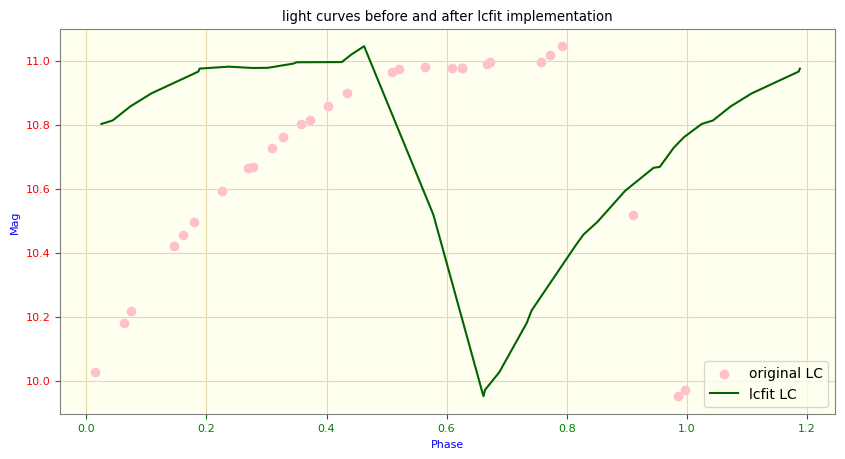

In [43]:
plt.style.use(custom_style_gold)

# light curves provided by Crestani
file_path_org = '/Users/melikakeshavarz/Desktop/Thesis/data/LC/630421935431871232.csv'
ph_org = pd.read_csv(file_path_org)

# light curves by lcfit
file_path_phased = '/Users/melikakeshavarz/Desktop/Thesis/Dekany_replication/DR3_LC_g/630421935431871232.dat'
data = []
with open(file_path_phased, 'r') as file:
    for line in file:
        out_line=line
        if line.startswith('# '):
            out_line=line.replace('# ', '')
        
            

        data.append(out_line)

ph = pd.read_csv(io.StringIO(''.join(data)), delim_whitespace=True, header= None)
ph.columns = {'Phase': '0', 'Value': '1'}



fig, ax = plt.subplots()

ax.scatter(ph_org.fase, ph_org.mag, label = 'original LC', color = 'pink')
ax.plot(ph.Phase, ph.Value, label = 'lcfit LC', color = 'darkgreen')
ax.set_xlabel('Phase')
ax.set_ylabel('Mag')
ax.set_title('light curves before and after lcfit implementation')
ax.grid(True)
ax.legend()

Text(0, 0.5, 'mag')

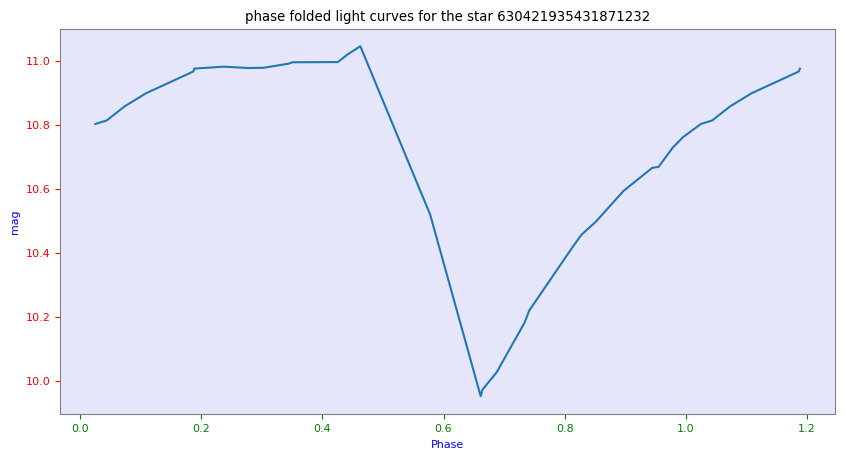

In [39]:



plt.plot(ph.Phase, ph.Value)
plt.title('phase folded light curves for the star 630421935431871232')
plt.xlabel('Phase')
plt.ylabel('mag')

In [10]:
DR3 = pd.read_csv('/Users/melikakeshavarz/Desktop/Thesis/data/rrls_crestani.csv')
DR3 = DR3[['source_id', 'pf']]





Train = DR3.sample(frac=0.70, random_state=42)
indices_to_drop = DR3[DR3.isin(Train.to_dict(orient='list')).all(axis=1)].index
Test = DR3.drop(indices_to_drop)
Train




,source_id,pf
68,6322601191571653504,0.778894
22,2973463347160718976,0.581474
72,2981136563934324224,0.587247
73,4985455998336183168,0.510915
0,6380659528686603008,0.550068
...,...,...
50,5773390391856998656,0.587257
64,5384505910934827392,0.604515
46,2336550174250087936,0.493352
65,6570585628216929408,0.570056


In [11]:
output_file_path_Train = '/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/Crestani_T/Train_DR3.lst'


with open(output_file_path_Train, 'w') as f_1:
    f_1.write('# id  period'+ '\n')
    Train.to_string(f_1, index=False, header=False, float_format='%.8f')

output_file_path_Test = '/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/Crestani_T/Test_DR3.lst'

with open(output_file_path_Test, 'w') as f_2:
    f_2.write('# id  period'+ '\n')
    Test.to_string(f_2, index=False, header=False, float_format='%.8f')

In [36]:
list(Train.source_id)



[6322601191571653504,
 2973463347160718976,
 2981136563934324224,
 4985455998336183168,
 6380659528686603008,
 3699778119760745472,
 6483680332235888896,
 4229920123678447232,
 4854226777298797952,
 5768557209320424320,
 3765574712337027456,
 1191510003353849472,
 3915998558830693888,
 3499611306368945536,
 4842417335222335104,
 2973954279102006656,
 1770039418063209600,
 6910611591970329216,
 5806921716937210496,
 5911972631268753792,
 2497458508359533184,
 2689556491246048896,
 4344296958198114688,
 3677686044939929728,
 4410058473777585024,
 5021251939406481280,
 6005656897473385600,
 3797319369672686592,
 5737579706158770560,
 6484572104886495872,
 6539269990871163392,
 3839232130153219456,
 5032510629236996608,
 4473628559603349888,
 3698725337376560512,
 4784552718312266624,
 1786827307055763968,
 5461994302138361728,
 4860671839583430912,
 4870497075488741888,
 1760981190300823808,
 3626569264033312896,
 6309626679485732608,
 6796320308904070016,
 4709830423483623808,
 237382705

In [13]:
path_time = '/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/DR3_time_series_g/'

list_stars_time = os.listdir(path_time)
list_stars_time


['5769986338215537280.dat',
 '1793460115244988800.dat',
 '2976126948438805760.dat',
 '5911972631268753792.dat',
 '1760981190300823808.dat',
 '3462535705561799552.dat',
 '2973463347160718976.dat',
 '5058670209887423616.dat',
 '4055098870077726976.dat',
 '6787617919184986496.dat',
 '6484572104886495872.dat',
 '6565527904791301504.dat',
 '4784552718312266624.dat',
 '4985455998336183168.dat',
 '.DS_Store',
 '3698725337376560512.dat',
 '4344296958198114688.dat',
 '3460867849501581824.dat',
 '6735230515154698880.dat',
 '630421935431871232.dat',
 '6492356127518044800.dat',
 '2497458508359533184.dat',
 '5032510629236996608.dat',
 '2608819623000543744.dat',
 '3546458301374134528.dat',
 '6483680332235888896.dat',
 '5151789464548893184.dat',
 '6539269990871163392.dat',
 '3839232130153219456.dat',
 '5773390391856998656.dat',
 '2438710609949867776.dat',
 '6322601191571653504.dat',
 '5026371849661393664.dat',
 '5398731873409720448.dat',
 '4870497075488741888.dat',
 '2381771781829913984.dat',
 '50143

In [38]:
path_time = '/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/DR3_time_series_g/'

list_stars_time = os.listdir(path_time)

for file in list_stars_time :
    f = file.replace('.dat', '')
    if f.startswith('.DS_Store'):
        pass
    elif int(f) in list(Train.source_id):
        shutil.copy(path_time + str(f) + '.dat' ,'/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/Crestani_T/Train_Time/')
    elif int(f) in list(Test.source_id):
        shutil.copy(path_time + str(f) + '.dat', '/Users/melikakeshavarz/Desktop/Thesis/processing_LC_lcfit/Crestani_T/Test_Time/')
    else:
        print(f)
        


In [40]:
!python lcfit.py @lcfit.par

===================> OBJECT 1 : 5412243359495900928<===================
object 1 (5412243359495900928)
./Crestani_T/Test/Test_Time/5412243359495900928.dat found.

----------
Dataset 1
----------
n_LC = 61
P_in = 0.57351318
---------- Direct Fourier fit ----------

Iteration 1
order = 4  --->  score = 0.04172025
order = 5  --->  score = 0.03763238
order = 6  --->  score = 0.03708214

optimal order = 6  (mean CV score = 0.037)
number of outliers: 1
Iteration 2
order = 4  --->  score = 0.03401017
order = 5  --->  score = 0.02901218
order = 6  --->  score = 0.02758658

optimal order = 6  (mean CV score = 0.028)
number of outliers: 1
Iteration 3
order = 4  --->  score = 0.02914656
order = 5  --->  score = 0.02477927
order = 6  --->  score = 0.02364843

optimal order = 6  (mean CV score = 0.024)
number of outliers: 0

object: 5412243359495900928  ,   N=59 (61)  ,  ap. 1:  N_F=6  ,  P=0.573507  ,  dP=-0.000006  ,  sig=0.018  ,  cost=0.0100  ,  <mag>=11.921  ,  SNR=311.05
RESULTS:
object: 5412